Analyzing the asteroids it was found that they contain significant amounts of deuterium.
After the discoveries began to look for indicators of the amount of deuterium, the miners say that it seems to be related again to the amount of violet stones, they also observed a violet powder on the surface, and a yellow liquid.

From the collected data R3 try to predict the amount of deuterium that an asteroid will have.

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import lr_assumptions as lr
import val_curves_helper as vc_helper

In [2]:
df = pd.read_csv('R3.csv')

In [3]:
print(df.describe())

       violet_stone_count  violet_dust_kg  yellow_liquid_l  deuterium_l
count          100.000000      100.000000       100.000000   100.000000
mean            71.690000       21.428050        25.081757    93.605294
std             44.399403       13.536833         4.959201    20.354034
min              1.000000        0.115101        14.293236    45.845170
25%             31.500000        9.705285        21.942924    78.337857
50%             70.000000       20.558395        25.291399    92.244355
75%            109.000000       32.266034        27.688507   109.161636
max            149.000000       45.122679        37.585125   145.435825


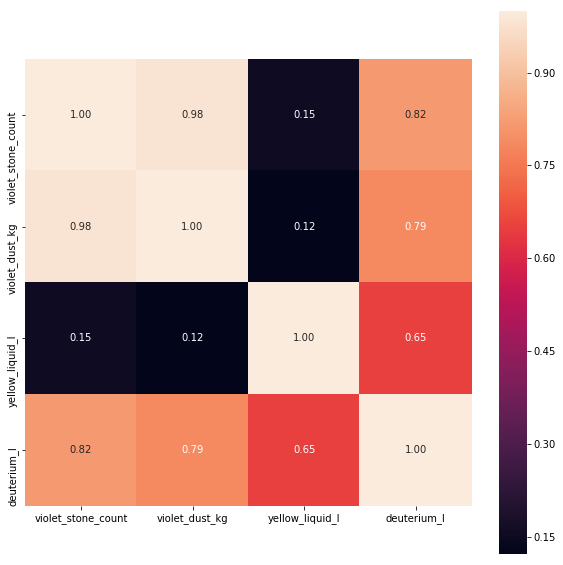

In [14]:
# correlation matrix as heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
plt.show()

- A linear relationship between violet_dust_kg and violet_stone_count is observed
- A linear relationship between deuterium and violet_stone_count is observed
- A linear relationship between deuterium and violet_dust_kg is observed
- A linear relationship between deuterium and yellow_liquid is observed

## Linear Regression Assumptions 

Assumptions

I) Linearity

II) Normality of the Error Terms

III) No Multicollinearity among Predictors

IV) No Autocorrelation of the Error Terms

V) Homoscedasticity

In [15]:
x = df[['violet_stone_count', 'violet_dust_kg', 'yellow_liquid_l']]
y = df.deuterium_l
regr = LinearRegression().fit(x, y)

## I) Linearity

('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
('Checking with a scatter plot of actual vs. predicted.', 'Predictions should follow the diagonal line.')


/anaconda2/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


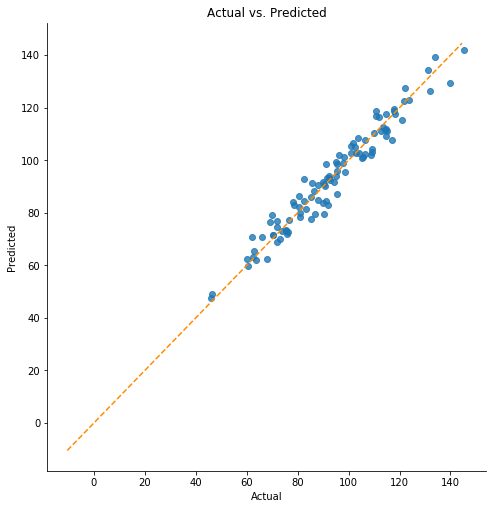

In [16]:
lr.linear_assumption(regr, x, y)

We can see a relatively even spread around the diagonal line.

## II) Normality of the Error Terms

('Assumption 2: The error terms are normally distributed', '\n')
Using the Anderson-Darling test for normal distribution
('p-value from the test - below 0.05 generally means non-normal:', 0.7001234453841246)
Residuals are normally distributed


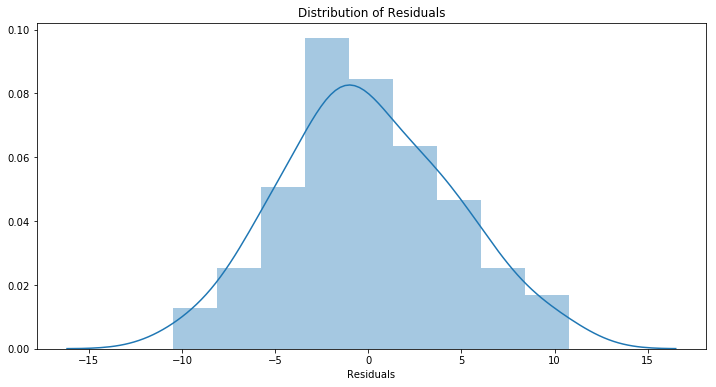

()
Assumption satisfied


In [18]:
lr.normal_errors_assumption(regr, x, y)

## III) No Multicollinearity among Predictors

Assumption 3: Little to no multicollinearity among predictors


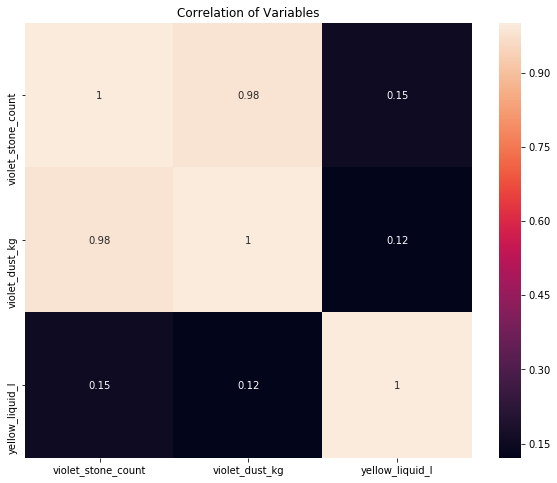

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 102.455701594
X2: 97.8631601764
X3: 3.63558647354
()
2 cases of possible multicollinearity
1 cases of definite multicollinearity
()
Assumption not satisfied
()
Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [19]:
linear_feature_names = ['X'+str(feature+1) for feature in range(x.shape[1])]
lr.multicollinearity_assumption(regr, x, y, linear_feature_names)

Assumption 3: Little to no multicollinearity among predictors


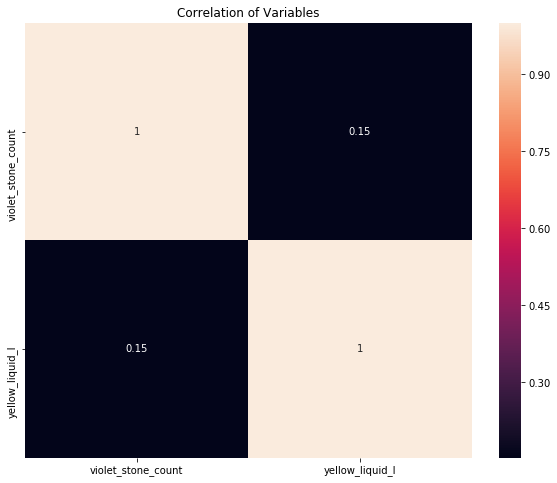

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 3.62182547219
X2: 3.62182547219
()
0 cases of possible multicollinearity
0 cases of definite multicollinearity
()
Assumption satisfied


In [20]:
x_ = df[['violet_stone_count', 'yellow_liquid_l']]
linear_feature_names = ['X'+str(feature+1) for feature in range(x_.shape[1])]
lr.multicollinearity_assumption(regr, x_, y, linear_feature_names)

## IV) No Autocorrelation of the Error Terms 

In [22]:
lr.autocorrelation_assumption(regr, x, y)

('Assumption 4: No Autocorrelation', '\n')

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
('Durbin-Watson:', 1.5722531705498033)
('Little to no autocorrelation', '\n')
Assumption satisfied


## V) Homoscedasticity  

('Assumption 5: Homoscedasticity of Error Terms', '\n')
Residuals should have relative constant variance


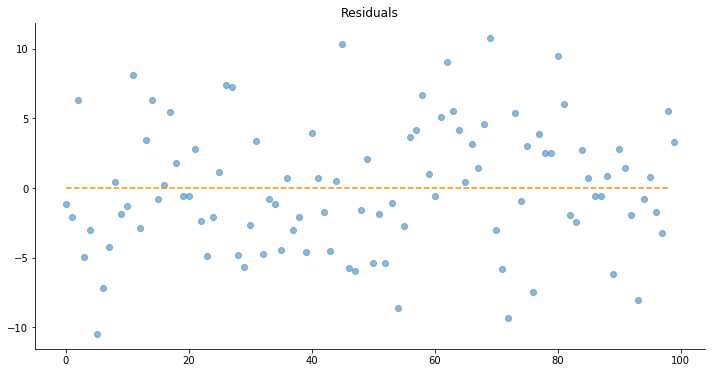

- There don’t appear to be any obvious problems with that.


In [23]:
lr.homoscedasticity_assumption(regr, x, y)
print("- There don’t appear to be any obvious problems with that.")

## Training model 

In [8]:
def print_model_statistics(regr, y_test, y_pred):

    # The coefficients
    print('Coefficients: ', regr.coef_)

    # The intercept_ 
    print('Intercept (Y axis when X = 0): ', regr.intercept_)

    # The mean squared error
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

In [26]:
X = df[['violet_stone_count', 'violet_dust_kg', 'yellow_liquid_l']]
y = df.deuterium_l

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [27]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

print()
print('- A negative coefficient makes no sense, this is due to the multicollinearity in the data set.')

('Coefficients: ', array([ 0.35807815, -0.06084672,  2.31152962]))
('Intercept (Y axis when X = 0): ', 11.26250729247279)
Mean squared error: 25.69
Coefficient of determination: 0.95
()
- A negative coefficient makes no sense, this is due to the multicollinearity in the data set.


In [ ]:
# remuevo 'violet_stone_count' para eliminar multicolinearidad

In [34]:
X = df[['violet_dust_kg', 'yellow_liquid_l']]
y = df.deuterium_l

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [35]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

Coefficients:  [1.06642541 2.35959764]
Intercept (Y axis when X = 0):  11.801804861072881
Mean squared error: 35.31
Coefficient of determination: 0.93


In [ ]:
# remuevo 'violet_dust_kg' para eliminar multicolinearidad

In [6]:
X = df[['violet_stone_count', 'yellow_liquid_l']]
y = df.deuterium_l

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [9]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

('Coefficients: ', array([0.33943225, 2.31390072]))
('Intercept (Y axis when X = 0): ', 11.244986826136)
Mean squared error: 25.68
Coefficient of determination: 0.95


- The model will be trained with the features ['violet_stone_count', 'yellow_liquid_l'] to return better values in the metrics Mean squared error and r2_score

## Performance & sensitivity analysis

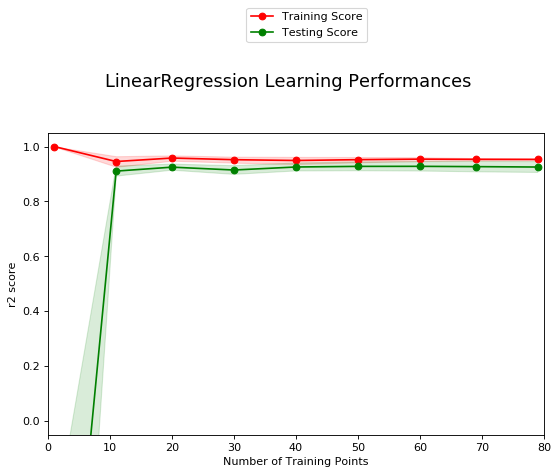

In [10]:
vc_helper.plot_learning_performance(regr, X, y)

- No trace of overfitting or underfitting is observed
- Few points are needed for the model to adjust to the behavior of the dataset

In [12]:
data_to_trial = (71, 21.048630)
vc_helper.predict_trials(X, y, regr, data_to_trial)

Trial 1: 84.74
Trial 2: 84.09
Trial 3: 84.45
Trial 4: 84.84
Trial 5: 84.46
Trial 6: 84.51
Trial 7: 84.80
Trial 8: 84.28
Trial 9: 84.82
Trial 10: 85.10

Range in values: 1.01


- the range observed between Trials is not significant, therefore the uniformity in the distribution of data that we can observe in the linear graph is re-validated